# Chemostat

A chemostat can maintain a concentration of nutrients in a container by flowing in and flowing out nutrients each at a constant rate.
Here we will set up a simulatable chemostat with a clonal and unevolving unicellular organism, and adjust the flow rate to observe the effect on the growth rate of the cells.
More specifically, we will assume that a cell `C` replicates following metabolism of three units of the nutrient `N`, and that cells die memorylessly at a constant stochastic rate.

In [1]:
import random
random.seed(0)

In [2]:
from pykappa.system import System

system = System.from_ka(
    """
    %init: 10 C(n{0})  // Start with a few cells

    %obs: 'C' |C()|

    . -> N() @ 1  // Nutrient inflow
    N() -> . @ 0.1  // Nutrient outflow

    // Metabolism
    C(n{0}), N() -> C(n{1}), . @ 0.5
    C(n{1}), N() -> C(n{2}), . @ 0.5
    C(n{2}), N() -> C(n{3}), . @ 0.5

    C(n{3}), . -> C(n{0}), C(n{0}) @ 0.1 // Cell division
    C() -> . @ 0.01  // Cell death
    """
)

If we started with only, say, one cell, it would be reasonably likely that the population would die out before replicating sufficiently to virtually preclude extinction.

Let's start the chemostat and observe the population size:

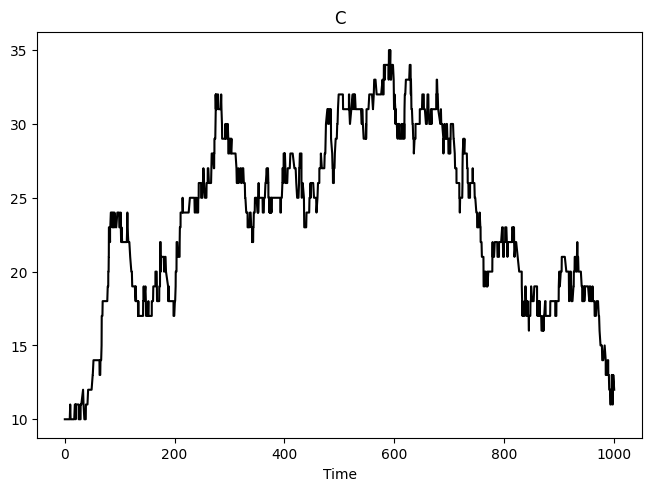

In [3]:
while system.time < 10 ** 3:
    system.update()
system.monitor.plot();

Now let's increase inflow of the nutrient without changing the outflow rate and observe that the population size increases:

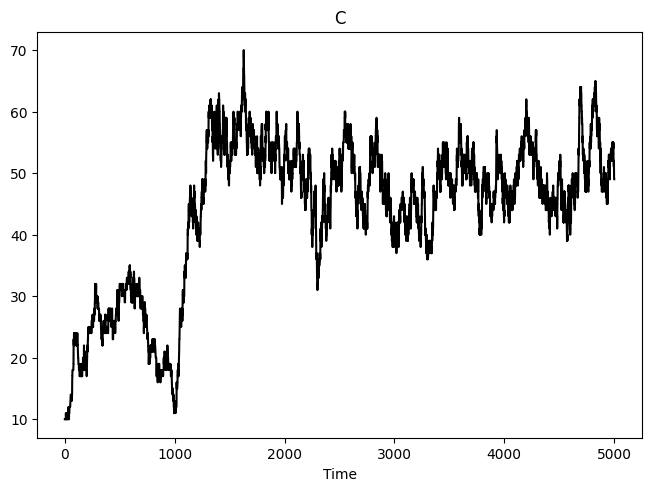

In [4]:
system.add_rule(". -> N() @ 1")

while system.time < 5 * 10 ** 3:
    system.update()
system.monitor.plot();